In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [1]:
2,3

(2, 3)

In [2]:
os.chdir("D:/Dataset/AirPassengers")

In [3]:
dataset = pd.read_csv("AirPassengers.csv")

In [4]:
dataset.columns

Index(['Month', '#Passengers'], dtype='object')

In [5]:
dataset['Month'].dtypes

dtype('O')

In [6]:
dataset['#Passengers'].dtypes

dtype('int64')

In [7]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)

In [8]:
indexedDataSet = dataset.set_index(['Month'])

In [9]:
from datetime import datetime
indexedDataSet.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


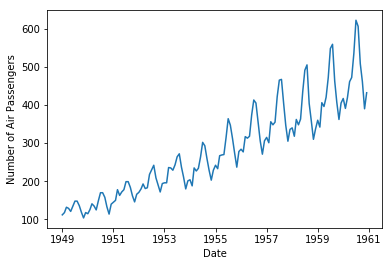

In [10]:
## plot graph

plt.xlabel("Date")
plt.ylabel("Number of Air Passengers")
plt.plot(indexedDataSet)

In [11]:
#Determining rolling statistics
rolmean = indexedDataSet.rolling(window=12).mean()

rolstd = indexedDataSet.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

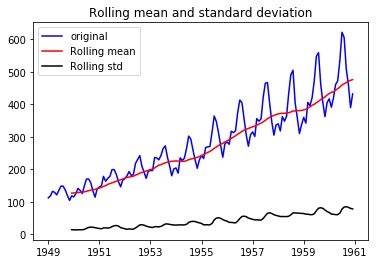

In [12]:
#plot rolling statistics

orig = plt.plot(indexedDataSet, color='blue' , label = 'original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
std = plt.plot(rolstd, color='black' , label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block = False)


In [13]:
#Perform Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of dickey fuller test')
dftest = adfuller(indexedDataSet['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value
    
print(dfoutput)    

Result of dickey fuller test
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


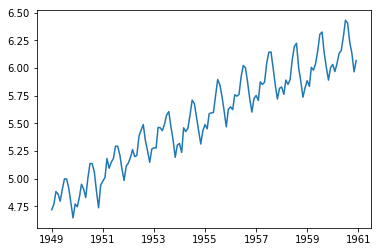

In [14]:
#Estimating trend
indexedDataSet_logScale = np.log(indexedDataSet)
plt.plot(indexedDataSet_logScale)

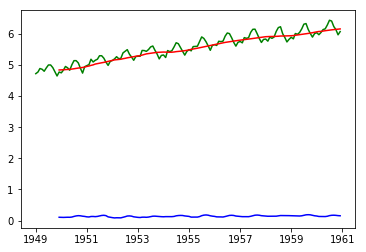

In [15]:
#Calculate and plot moving average of indexedDataSet_logScale

movingAverage = indexedDataSet_logScale.rolling(window=12).mean()
movingSTD = indexedDataSet_logScale.rolling(window=12).std()
plt.plot(indexedDataSet_logScale, color='green')
plt.plot(movingAverage, color = 'red')
plt.plot(movingSTD , color='blue')

In [16]:
#Take difference between mean and moving average

datasetLogScaleMinusMovingAverage = indexedDataSet_logScale- movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [17]:
#Remove NAN Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue' , label = 'original')
    mean = plt.plot(movingAverage, color='red' , label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black' , label = 'RollingSTD')
    plt.legend(loc = 'best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block = False)
    
    #Perform Augmented dicky-fuller test
    print("Results of dicky fuller test")
    dftest = adfuller(timeseries['#Passengers'],autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic' , 'p-value' , '#lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)    

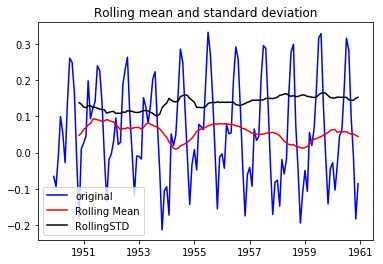

Results of dicky fuller test
Test Statistic                  -3.162908
p-value                          0.022235
#lags used                      13.000000
Number of observations used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [19]:
test_stationarity(datasetLogScaleMinusMovingAverage)

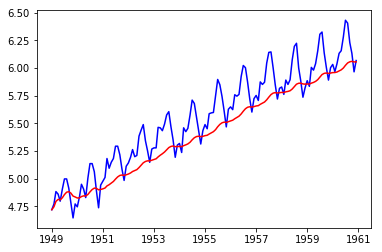

In [20]:
exponentialDecayWeightedAverage = indexedDataSet_logScale.ewm(halflife=12, min_periods=0).mean()
                                
plt.plot(indexedDataSet_logScale, color='blue')
plt.plot(exponentialDecayWeightedAverage, color='red')

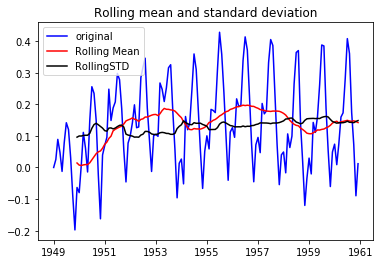

Results of dicky fuller test
Test Statistic                  -3.601262
p-value                          0.005737
#lags used                      13.000000
Number of observations used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataSet_logScale- exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

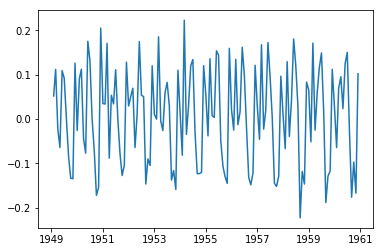

In [22]:
datasetLogDiffShifting = indexedDataSet_logScale-indexedDataSet_logScale.shift()
plt.plot(datasetLogDiffShifting)

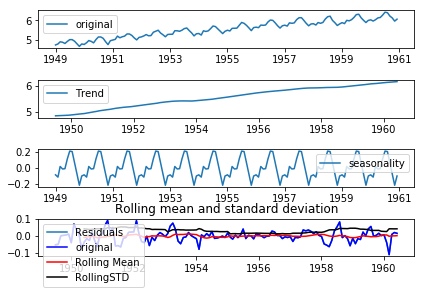

Results of dicky fuller test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#lags used                     9.000000e+00
Number of observations used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataSet_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataSet_logScale, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

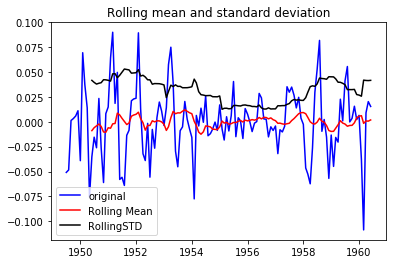

Results of dicky fuller test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#lags used                     9.000000e+00
Number of observations used    1.220000e+02
Critical value (1%)           -3.485122e+00
Critical value (5%)           -2.885538e+00
Critical value (10%)          -2.579569e+00
dtype: float64


In [24]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [25]:
datasetLogDiffShifting.isna().sum()
datasetLogDiffShifting.isna
datasetLogDiffShifting.dropna(inplace=True)

In [26]:
datasetLogDiffShifting.isna().sum()

#Passengers    0
dtype: int64

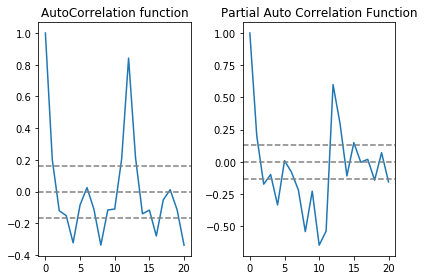

In [27]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color='gray')
plt.title('AutoCorrelation function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y= -1.6/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.axhline(y= 1.6/np.sqrt(len(datasetLogDiffShifting)), linestyle = '--', color = 'gray')
plt.title('Partial Auto Correlation Function')
plt.tight_layout()

G:\Anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
G:\Anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


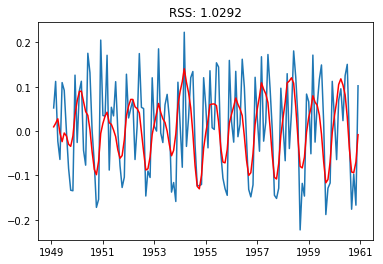

In [38]:
from statsmodels.tsa.arima_model import ARIMA

#Arima Model
model = ARIMA(indexedDataSet_logScale, order=(2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')

G:\Anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
G:\Anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


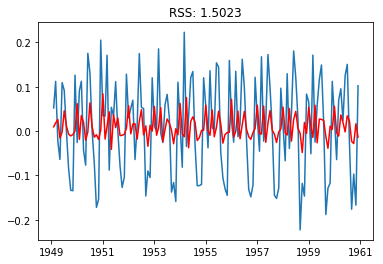

In [36]:
#Moving Average Model
model = ARIMA(indexedDataSet_logScale, order=(2,1,0))
results_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR Model')

G:\Anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
G:\Anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.0292')

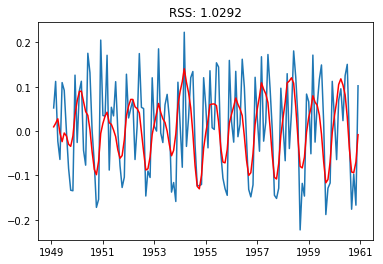

In [39]:
model = ARIMA(indexedDataSet_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues- datasetLogDiffShifting['#Passengers'])**2))

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [41]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [42]:
predictions_ARIMA_log = pd.Series(indexedDataSet_logScale['#Passengers'].ix[0], index = indexedDataSet_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value =0 )
predictions_ARIMA_log.head()

G:\Anaconda_install\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

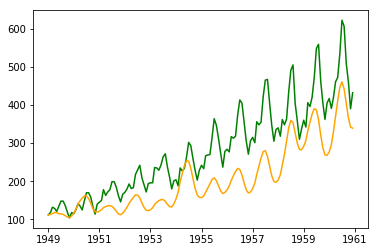

In [46]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataSet, color = 'green')
plt.plot(predictions_ARIMA, color='orange')

In [47]:
indexedDataSet_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


In [50]:
#results_ARIMA.plot_predict(1,264)
x = results_ARIMA.forecast(steps=120)
x

(array([6.09553406, 6.15281429, 6.22442997, 6.2924113 , 6.34164736,
        6.36359367, 6.35784677, 6.33139285, 6.29597517, 6.26447694,
        6.24738317, 6.25025176, 6.27275854, 6.30940339, 6.35151523,
        6.3898868 , 6.41727396, 6.43011056, 6.42906679, 6.41842471,
        6.40456136, 6.39403601, 6.39183078, 6.4001951 , 6.41833709,
        6.4429543 , 6.46937459, 6.49294005, 6.51024129, 6.51989034,
        6.52267571, 6.52112375, 6.51864515, 6.51853682, 6.52311922,
        6.53322368, 6.54812884, 6.56591575, 6.58410326, 6.60036553,
        6.61313274, 6.62192782, 6.62737784, 6.63093122, 6.63438683,
        6.63937982, 6.64696507, 6.65739849, 6.67015337, 6.68414265,
        6.69806639, 6.71077911, 6.72157738, 6.73033985, 6.73749809,
        6.74386376, 6.75037321, 6.75782594, 6.76668687, 6.77699831,
        6.78841329, 6.80032865, 6.81207205, 6.82308768, 6.83307141,
        6.84202495, 6.85022313, 6.85811222, 6.86617342, 6.87479154,
        6.88416308, 6.89426391, 6.90487898, 6.91